In [30]:
from photozpy import HeaderCorrection, Combine, Telescope, Calibration
from ccdproc import ImageFileCollection
from pathlib import Path
from astropy.time import Time
import numpy as np

from astropy.nddata import CCDData
from astropy.visualization import hist
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from astropy.stats import mad_std

from convenience_functions import show_image
from astropy.io import fits
#plt.style.use('guide.mplstyle')

from astropy.io import fits

In [31]:
telescope = Telescope(telescope = "RM", mode = "griz", ccd = "Andor")

In [38]:
path = Path("/Users/shengyong/conda_envs/photozpy/photozpy/src/photozpy/calibration/testing_files")
image_collection = ImageFileCollection(location = path, glob_include = "*.fits")

In [39]:
targets = {"B3_2238+410_": "B3 2238+410",
           "RX_J1533.3+3416": "RX J1533.3+3416", 
           "SA92-253": "SA92-253"}

In [40]:
header_edition = HeaderCorrection(image_collection = image_collection, telescope = telescope, target_dict = targets)

In [41]:
image_collection = header_edition.correct_headers_by_filename()

Editing headers by file names......


100%|███████████████████████████████████████████| 57/57 [00:05<00:00, 10.11it/s]


Header edition by file names completed!
----------------------------------------



In [42]:
image_collection = header_edition.correct_filter_headers()

Editting filter headers......


44it [00:02, 20.73it/s]


Filter header edition completed!
----------------------------------------



In [43]:
combine_images = Combine(image_collection, telescope)

In [44]:
combine_images.combine_bias_or_dark(image_type = "Bias")

Using ['Bias_001.fits', 'Bias_002.fits', 'Bias_003.fits', 'Bias_004.fits', 'Bias_005.fits', 'Bias_006.fits', 'Bias_007.fits', 'Bias_008.fits', 'Bias_009.fits', 'Bias_010.fits'] to combine the Bias image!
Bias combined!
----------------------------------------



In [45]:
calibrate_images = Calibration(image_collection)

In [46]:
calibrate_images.apply_bias_correction()

Start Bias correction....
Apply ['Master_Bias.fits'] correction to Dark_001.fits
Apply ['Master_Bias.fits'] correction to Dark_002.fits
Apply ['Master_Bias.fits'] correction to Dark_003.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan g'2_001.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan g'2_005.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan g'2_009.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan i'2_003.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan i'2_007.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan i'2_011.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan r'2_002.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan r'2_006.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan r'2_010.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan z'2_004.fits
Apply ['Master_Bias.fits'] correction to B3_2238+410_Sloan z'2_008.fits
Apply ['Master_Bi

In [47]:
combine_images.combine_bias_or_dark(image_type = "Dark")

Using ['Dark_001.fits', 'Dark_002.fits', 'Dark_003.fits'] to combine the Dark image!
Dark combined!
----------------------------------------



Text(0.5, 1.0, 'The combination algorithm comparison')

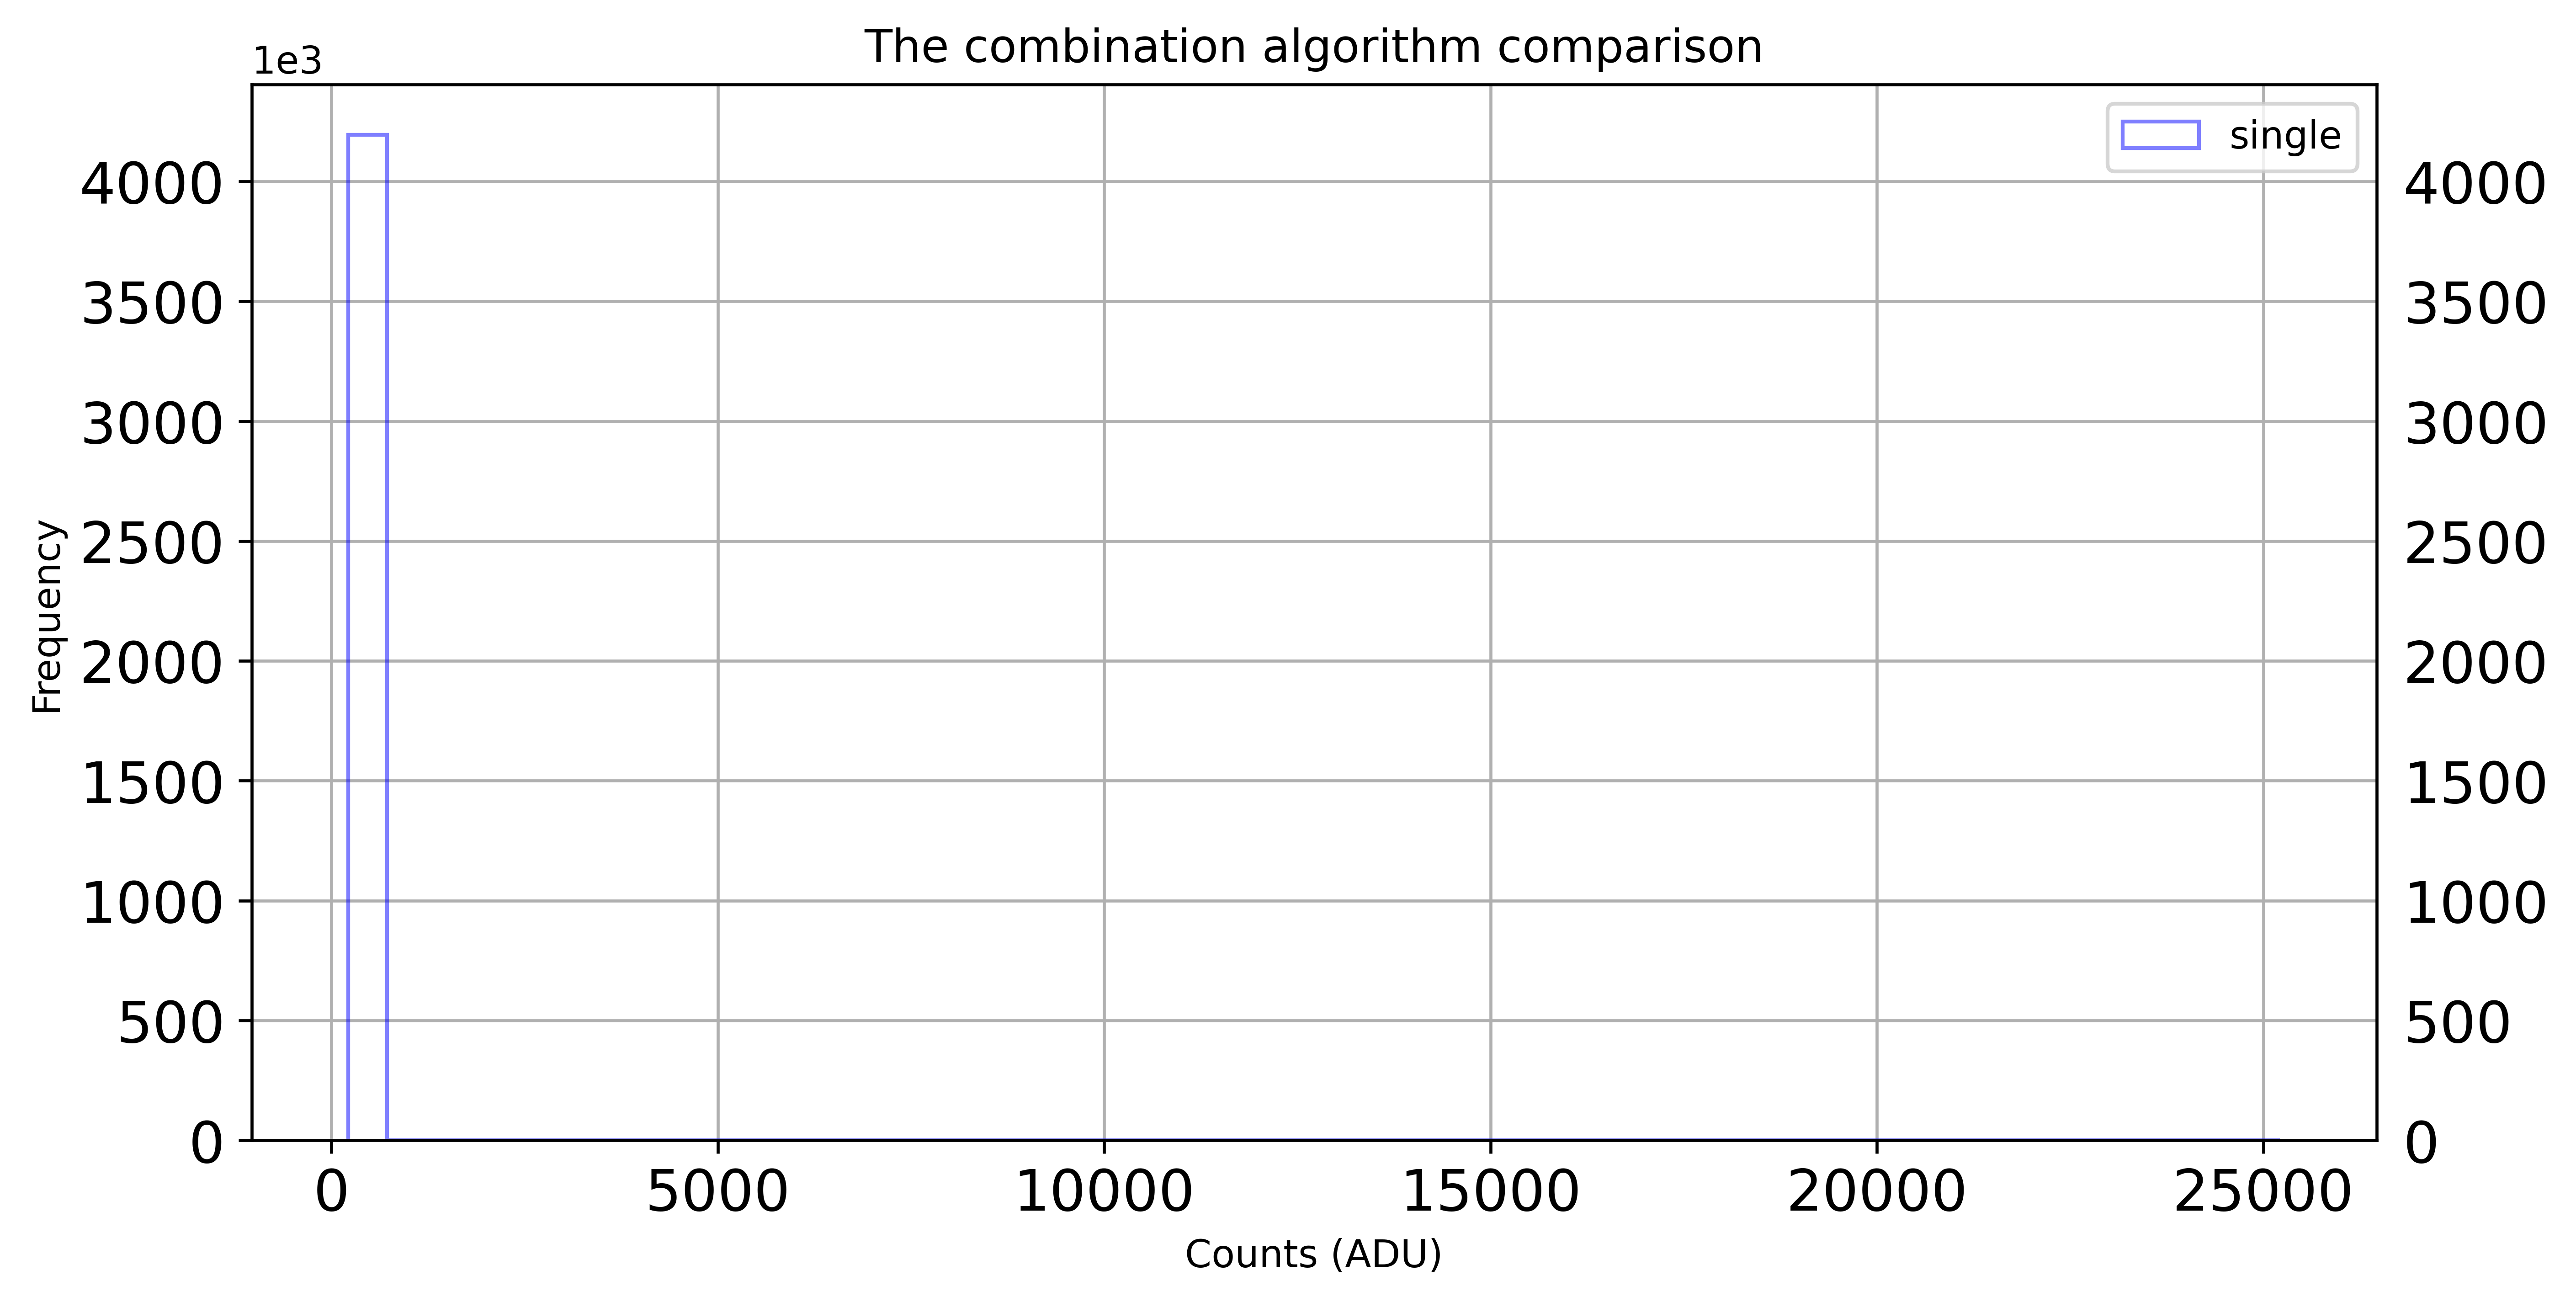

In [55]:
path = Path("/Users/shengyong/conda_envs/photozpy/photozpy/src/photozpy/calibration/20210807 Examined has flats")

# Read data

# Single bias
single_bias = CCDData.read(path/"Dark_001.fits", unit = "adu").data.flatten()

# the master bias by ccproc with average sigma clip
#ccdp_avg_sigma_clip = CCDData.read(path/"Master_Dark.fits").data.flatten()
#ccdp_avg_sigma_clip = ccdp_avg_sigma_clip[ccdp_avg_sigma_clip < 325]


fig, ax = plt.subplots(figsize = (10,5), sharex = False, nrows = 1, dpi = 600)

_ = ax.hist(single_bias[:-500], bins = 50, label = "single",histtype = "step", color = "blue", alpha = 0.5)
#_ = ax.hist(ccdp_avg_sigma_clip, bins = 50, label = "ccdproc master sigma clip", histtype = "step", color = "orange", alpha = 0.5)
plt.legend(fontsize = 10)
plt.grid()
#ax.set_xlim(220, 390)
ax.set_xlabel("Counts (ADU)")
ax.set_ylabel("Frequency")
ax.ticklabel_format(axis = "y", style = "sci", scilimits = (3,3))
plt.tick_params(axis='both', which='both', labelleft=True, labelright=True, labelbottom=True, labeltop=False, labelsize = 15)
ax.set_title("The combination algorithm comparison")
#fig.savefig("Bias combination algorithm comparison.png", dpi = 600, bbox_inches = "tight")

In [27]:
single_bias[single_bias>500]

array([ 2721.85      ,   583.3       ,   627.4       ,   783.75      ,
         821.95      ,  1753.2       ,   630.9       ,  1761.2       ,
         626.7       ,  1063.55      ,  1138.85      , 24866.        ,
         860.1       ,  2699.6       ,   622.4       ,   552.2       ,
        1632.8       ,   620.35      ,  3977.05      ,   732.05      ,
         529.45      ,   667.7       ,   615.3       ,   631.75      ,
         745.1       ,  1404.65      ,   761.65      ,  1031.        ,
        2820.45      ,  2785.55      ,   983.25      ,  2227.25      ,
        4344.25      ,   633.35      ,   546.65      ,   905.8       ,
         521.95      ,   837.65      ,   963.45      ,   570.95      ,
        1249.05      ,   655.85      ,  1299.        ,   562.1       ,
        7470.05      ,   828.75      ,  1028.5       ,   850.65      ,
        3055.35      ,   524.15      ,  1045.65      ,  1183.        ,
         646.75      ,  1256.05      ,   720.1       ,   698.55      ,
      